# 任务5 模型融合(3天)

 将特征放进模型中预测，并将预测结果作为新的特征加入原有特征中再经过模型预测结果（可以反复预测多次将结果加入最后的特征中）

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pylab as plt
from sklearn.ensemble import IsolationForest
# from pylab import *
# fname = r"/home/ach/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf"
# myfont = FontPro
train = pd.read_csv(r'/home/ach/下载/team-learning-master/数据竞赛（房租预测）/数据集/train_data.csv')
test = pd.read_csv(r'/home/ach/下载/team-learning-master/数据竞赛（房租预测）/数据集/test_a.csv')
# target_test = test.pop('tradeMoney')
# pop函数进行类似于栈的ｐｏｐ，弹出并删除某一个值
# target_train = train.pop('tradeMoney')
# target_test = test
# 对ｔｒａｉｎ进行数据清洗
# 使用第二天的代码
# 改进先不删除，不ｃｏｄｅｒ，最后一起ｃｏｄｅｒ
def preprocessingData(data):
    # 填充缺失值
    data['rentType'][data['rentType'] == '--'] = '未知方式'

    #     # 转换object类型数据
    #     columns = ['rentType','communityName','houseType', 'houseFloor', 'houseToward', 'houseDecoration',  'region', 'plate']

    #     for feature in columns:
    #         data[feature] = LabelEncoder().fit_transform(data[feature])

    # 将buildYear列转换为整型数据
    buildYearmean = pd.DataFrame(data[data['buildYear'] != '暂无信息']['buildYear'].mode())
    data.loc[data[data['buildYear'] == '暂无信息'].index, 'buildYear'] = buildYearmean.iloc[0, 0]
    data['buildYear'] = data['buildYear'].astype('int')

    # 处理pv和uv的空值
    data['pv'].fillna(data['pv'].mean(), inplace=True)
    data['uv'].fillna(data['uv'].mean(), inplace=True)
    data['pv'] = data['pv'].astype('int')
    data['uv'] = data['uv'].astype('int')

    #     # 分割交易时间
    #     def month(x):
    #         month = int(x.split('/')[1])
    #         return month
    #     def day(x):
    #         day = int(x.split('/')[2])
    #         return day
    #     data['month'] = data['tradeTime'].apply(lambda x: month(x))
    #     data['day'] = data['tradeTime'].apply(lambda x: day(x))

    #     # 去掉部分特征
    #     data.drop('city', axis=1, inplace=True)
    #     data.drop('tradeTime', axis=1, inplace=True)
    #     data.drop('ID', axis=1, inplace=True)
    return data


train = preprocessingData(train)
test = preprocessingData(test)
# clean data
def IF_drop(train):
    IForest = IsolationForest(contamination=0.01)
    IForest.fit(train["tradeMoney"].values.reshape(-1,1))
    y_pred = IForest.predict(train["tradeMoney"].values.reshape(-1,1))
    drop_index = train.loc[y_pred==-1].index
    print(drop_index)
    train.drop(drop_index,inplace=True)# 有删除
    return train

train = IF_drop(train)
def dropData(train):
    # 丢弃部分异常值
    train = train[train.area <= 200]
    train = train[(train.tradeMoney <=16000) & (train.tradeMoney >=700)]
    train.drop(train[(train['totalFloor'] == 0)].index, inplace=True)
    return train
#数据集异常值处理
train = dropData(train)
def cleanData(data):
    data.drop(data[(data['region']=='RG00001') & (data['tradeMoney']<1000)&(data['area']>50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['tradeMoney']>25000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['area']>250)&(data['tradeMoney']<20000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['area']>400)&(data['tradeMoney']>50000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00001') & (data['area']>100)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00002') & (data['area']<100)&(data['tradeMoney']>60000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['area']<300)&(data['tradeMoney']>30000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']<500)&(data['area']<50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']<1500)&(data['area']>100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']<2000)&(data['area']>300)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['tradeMoney']>5000)&(data['area']<20)].index,inplace=True)
    data.drop(data[(data['region']=='RG00003') & (data['area']>600)&(data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00004') & (data['tradeMoney']<1000)&(data['area']>80)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['tradeMoney']<200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']<2000)&(data['area']>180)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']>50000)&(data['area']<200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['area']>200)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00007') & (data['area']>100)&(data['tradeMoney']<2500)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['area']>200)&(data['tradeMoney']>25000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['area']>400)&(data['tradeMoney']<15000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['tradeMoney']<3000)&(data['area']>200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['tradeMoney']>7000)&(data['area']<75)].index,inplace=True)
    data.drop(data[(data['region']=='RG00010') & (data['tradeMoney']>12500)&(data['area']<100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00004') & (data['area']>400)&(data['tradeMoney']>20000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008') & (data['tradeMoney']<2000)&(data['area']>80)].index,inplace=True)
    data.drop(data[(data['region']=='RG00009') & (data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00009') & (data['area']>300)].index,inplace=True)
    data.drop(data[(data['region']=='RG00009') & (data['area']>100)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00011') & (data['tradeMoney']<10000)&(data['area']>390)].index,inplace=True)
    data.drop(data[(data['region']=='RG00012') & (data['area']>120)&(data['tradeMoney']<5000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00013') & (data['area']<100)&(data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00013') & (data['area']>400)&(data['tradeMoney']>50000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00013') & (data['area']>80)&(data['tradeMoney']<2000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['area']>300)&(data['tradeMoney']>40000)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<1300)&(data['area']>80)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<8000)&(data['area']>200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<1000)&(data['area']>20)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']>25000)&(data['area']>200)].index,inplace=True)
    data.drop(data[(data['region']=='RG00014') & (data['tradeMoney']<20000)&(data['area']>250)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']>30000)&(data['area']<100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']<50000)&(data['area']>600)].index,inplace=True)
    data.drop(data[(data['region']=='RG00005') & (data['tradeMoney']>50000)&(data['area']>350)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['tradeMoney']>4000)&(data['area']<100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['tradeMoney']<600)&(data['area']>100)].index,inplace=True)
    data.drop(data[(data['region']=='RG00006') & (data['area']>165)].index,inplace=True)
    data.drop(data[(data['region']=='RG00012') & (data['tradeMoney']<800)&(data['area']<30)].index,inplace=True)
    data.drop(data[(data['region']=='RG00007') & (data['tradeMoney']<1100)&(data['area']>50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00004') & (data['tradeMoney']>8000)&(data['area']<80)].index,inplace=True)
    data.loc[(data['region']=='RG00002')&(data['area']>50)&(data['rentType']=='合租'),'rentType']='整租'
    data.loc[(data['region']=='RG00014')&(data['rentType']=='合租')&(data['area']>60),'rentType']='整租'
    data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']>15000)&(data['area']<110)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']>20000)&(data['area']>110)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008')&(data['tradeMoney']<1500)&(data['area']<50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00008')&(data['rentType']=='合租')&(data['area']>50)].index,inplace=True)
    data.drop(data[(data['region']=='RG00015') ].index,inplace=True)
    data.reset_index(drop=True, inplace=True)
    return data
train = cleanData(train)
target_train = train.pop('tradeMoney')#这是精髓，将这一列去掉，好连接

def newfeature(data):
    # 将houseType转为'Room'，'Hall'，'Bath'
    def Room(x):
        Room = int(x.split('室')[0])
        return Room

    def Hall(x):
        Hall = int(x.split("室")[1].split("厅")[0])
        return Hall

    def Bath(x):
        Bath = int(x.split("室")[1].split("厅")[1].split("卫")[0])
        return Bath

    data['Room'] = data['houseType'].apply(lambda x: Room(x))
    data['Hall'] = data['houseType'].apply(lambda x: Hall(x))
    data['Bath'] = data['houseType'].apply(lambda x: Bath(x))
    data['Room_Bath'] = (data['Bath'] + 1) / (data['Room'] + 1)
    # 填充租房类型
    data.loc[(data['rentType'] == '未知方式') & (data['Room'] <= 1), 'rentType'] = '整租'
    # print(data.loc[(data['rentType']=='未知方式')&(data['Room_Bath']>1),'rentType'])
    data.loc[(data['rentType'] == '未知方式') & (data['Room_Bath'] > 1), 'rentType'] = '合租'
    data.loc[(data['rentType'] == '未知方式') & (data['Room'] > 1) & (data['area'] < 50), 'rentType'] = '合租'
    data.loc[(data['rentType'] == '未知方式') & (data['area'] / data['Room'] < 20), 'rentType'] = '合租'
    # data.loc[(data['rentType']=='未知方式')&(data['area']>60),'rentType']='合租'
    data.loc[(data['rentType'] == '未知方式') & (data['area'] <= 50) & (data['Room'] == 2), 'rentType'] = '合租'
    data.loc[(data['rentType'] == '未知方式') & (data['area'] > 60) & (data['Room'] == 2), 'rentType'] = '整租'
    data.loc[(data['rentType'] == '未知方式') & (data['area'] <= 60) & (data['Room'] == 3), 'rentType'] = '合租'
    data.loc[(data['rentType'] == '未知方式') & (data['area'] > 60) & (data['Room'] == 3), 'rentType'] = '整租'
    data.loc[(data['rentType'] == '未知方式') & (data['area'] >= 100) & (data['Room'] > 3), 'rentType'] = '整租'

    # data.drop('Room_Bath', axis=1, inplace=True)
    # 提升0.0001
    def month(x):
        month = int(x.split('/')[1])
        return month

    # def day(x):
    #     day = int(x.split('/')[2])
    #     return day
    # 结果变差

    # 分割交易时间
    # data['year']=data['tradeTime'].apply(lambda x:year(x))
    data['month'] = data['tradeTime'].apply(lambda x: month(x))
    # data['day'] = data['tradeTime'].apply(lambda x: day(x))# 结果变差
    #     data['pv/uv'] = data['pv'] / data['uv']
    #     data['房间总数'] = data['室'] + data['厅'] + data['卫']

    # 合并部分配套设施特征
    data['trainsportNum'] = 5 * data['subwayStationNum'] / data['subwayStationNum'].mean() + data['busStationNum'] / \
                            data[
                                'busStationNum'].mean()
    data['all_SchoolNum'] = 2 * data['interSchoolNum'] / data['interSchoolNum'].mean() + data['schoolNum'] / data[
        'schoolNum'].mean() \
                            + data['privateSchoolNum'] / data['privateSchoolNum'].mean()
    data['all_hospitalNum'] = 2 * data['hospitalNum'] / data['hospitalNum'].mean() + \
                              data['drugStoreNum'] / data['drugStoreNum'].mean()
    data['all_mall'] = data['mallNum'] / data['mallNum'].mean() + \
                       data['superMarketNum'] / data['superMarketNum'].mean()
    data['otherNum'] = data['gymNum'] / data['gymNum'].mean() + data['bankNum'] / data['bankNum'].mean() + \
                       data['shopNum'] / data['shopNum'].mean() + 2 * data['parkNum'] / data['parkNum'].mean()

    data.drop(['subwayStationNum', 'busStationNum',
               'interSchoolNum', 'schoolNum', 'privateSchoolNum',
               'hospitalNum', 'drugStoreNum', 'mallNum', 'superMarketNum', 'gymNum', 'bankNum', 'shopNum', 'parkNum'],
              axis=1, inplace=True)
    # 提升0.0005

    #     data['houseType_1sumcsu']=data['Bath'].map(lambda x:str(x))+data['month'].map(lambda x:str(x))
    #     data['houseType_2sumcsu']=data['Bath'].map(lambda x:str(x))+data['communityName']
    #     data['houseType_3sumcsu']=data['Bath'].map(lambda x:str(x))+data['plate']

    data.drop('houseType', axis=1, inplace=True)
    data.drop('tradeTime', axis=1, inplace=True)

    data["area"] = data["area"].astype(int)

    # categorical_feats = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName','region', 'plate']
    categorical_feats = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'region', 'plate', 'cluster']

    return data, categorical_feats


train, train_categorical = newfeature(train)
test, test_categorical = newfeature(test)
# 初步特征融合
# 计算统计特征
def featureCount(train, test):
    train['data_type'] = 0
    test['data_type'] = 1
    data = pd.concat([train, test], axis=0, join='outer')

    def feature_count(data, features=[]):
        new_feature = 'count'
        for i in features:
            new_feature += '_' + i
        temp = data.groupby(features).size().reset_index().rename(columns={0: new_feature})
        data = data.merge(temp, 'left', on=features)
        return data

    data = feature_count(data, ['communityName'])
    data = feature_count(data, ['buildYear'])
    data = feature_count(data, ['totalFloor'])
    data = feature_count(data, ['communityName', 'totalFloor'])
    data = feature_count(data, ['communityName', 'newWorkers'])
    data = feature_count(data, ['communityName', 'totalTradeMoney'])
    new_train = data[data['data_type'] == 0]
    new_test = data[data['data_type'] == 1]
    new_train.drop('data_type', axis=1, inplace=True)
    new_test.drop(['data_type'], axis=1, inplace=True)
    return new_train, new_test


train, test = featureCount(train, test)


# groupby生成统计特征：mean,std等

def gourpby(train, test):
    train['data_type'] = 0
    test['data_type'] = 1
    data = pd.concat([train, test], axis=0, join='outer')
    columns = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName', 'region', 'plate']
    for feature in columns:
        data[feature] = LabelEncoder().fit_transform(data[feature])

    temp = data.groupby('communityName')['area'].agg({'com_area_mean': 'mean', 'com_area_std': 'std'})
    temp.fillna(0, inplace=True)
    data = data.merge(temp, on='communityName', how='left')

    data['price_per_area'] = data.tradeMeanPrice / data.area * 100
    temp = data.groupby('communityName')['price_per_area'].agg(
        {'comm_price_mean': 'mean', 'comm_price_std': 'std'})
    temp.fillna(0, inplace=True)
    data = data.merge(temp, on='communityName', how='left')

    temp = data.groupby('plate')['price_per_area'].agg(
        {'plate_price_mean': 'mean', 'plate_price_std': 'std'})
    temp.fillna(0, inplace=True)
    data = data.merge(temp, on='plate', how='left')
    data.drop('price_per_area', axis=1, inplace=True)

    temp = data.groupby('plate')['area'].agg({'plate_area_mean': 'mean', 'plate_area_std': 'std'})
    temp.fillna(0, inplace=True)
    data = data.merge(temp, on='plate', how='left')

    temp = data.groupby(['plate'])['buildYear'].agg({'plate_year_mean': 'mean', 'plate_year_std': 'std'})
    data = data.merge(temp, on='plate', how='left')
    data.plate_year_mean = data.plate_year_mean.astype('int')
    data['comm_plate_year_diff'] = data.buildYear - data.plate_year_mean
    data.drop('plate_year_mean', axis=1, inplace=True)

    temp = data.groupby('plate')['trainsportNum'].agg('sum').reset_index(name='plate_trainsportNum')
    data = data.merge(temp, on='plate', how='left')
    temp = data.groupby(['communityName', 'plate'])['trainsportNum'].agg('sum').reset_index(name='com_trainsportNum')
    data = data.merge(temp, on=['communityName', 'plate'], how='left')
    data['trainsportNum_ratio'] = list(map(lambda x, y: round(x / y, 3) if y != 0 else -1,
                                           data['com_trainsportNum'], data['plate_trainsportNum']))
    data = data.drop(['com_trainsportNum', 'plate_trainsportNum'], axis=1)

    temp = data.groupby('plate')['all_SchoolNum'].agg('sum').reset_index(name='plate_all_SchoolNum')
    data = data.merge(temp, on='plate', how='left')
    temp = data.groupby(['communityName', 'plate'])['all_SchoolNum'].agg('sum').reset_index(name='com_all_SchoolNum')
    data = data.merge(temp, on=['communityName', 'plate'], how='left')
    data = data.drop(['com_all_SchoolNum', 'plate_all_SchoolNum'], axis=1)

    temp = data.groupby(['communityName', 'plate'])['all_mall'].agg('sum').reset_index(name='com_all_mall')
    data = data.merge(temp, on=['communityName', 'plate'], how='left')

    temp = data.groupby('plate')['otherNum'].agg('sum').reset_index(name='plate_otherNum')
    data = data.merge(temp, on='plate', how='left')
    temp = data.groupby(['communityName', 'plate'])['otherNum'].agg('sum').reset_index(name='com_otherNum')
    data = data.merge(temp, on=['communityName', 'plate'], how='left')
    data['other_ratio'] = list(map(lambda x, y: round(x / y, 3) if y != 0 else -1,
                                   data['com_otherNum'], data['plate_otherNum']))
    data = data.drop(['com_otherNum', 'plate_otherNum'], axis=1)

    temp = data.groupby(['month', 'communityName']).size().reset_index(name='communityName_saleNum')
    data = data.merge(temp, on=['month', 'communityName'], how='left')
    temp = data.groupby(['month', 'plate']).size().reset_index(name='plate_saleNum')
    data = data.merge(temp, on=['month', 'plate'], how='left')

    data['sale_ratio'] = round((data.communityName_saleNum + 1) / (data.plate_saleNum + 1), 3)
    data['sale_newworker_differ'] = 3 * data.plate_saleNum - data.newWorkers
    data.drop(['communityName_saleNum', 'plate_saleNum'], axis=1, inplace=True)

    new_train = data[data['data_type'] == 0]
    new_test = data[data['data_type'] == 1]
    new_train.drop('data_type', axis=1, inplace=True)
    new_test.drop(['data_type'], axis=1, inplace=True)
    return new_train, new_test


train, test = gourpby(train, test)
# 聚类
def cluster(train, test):
    from sklearn.mixture import GaussianMixture

    train['data_type'] = 0
    test['data_type'] = 1
    data = pd.concat([train, test], axis=0, join='outer')
    col = ['totalFloor',
           'houseDecoration', 'communityName', 'region', 'plate', 'buildYear',

           'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
           'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',

           'landTotalPrice', 'landMeanPrice', 'totalWorkers',
           'newWorkers', 'residentPopulation', 'lookNum',
           'trainsportNum',
           'all_SchoolNum', 'all_hospitalNum', 'all_mall', 'otherNum']

    # EM
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
    data['cluster'] = pd.DataFrame(gmm.fit_predict(data[col]))
    print(data['cluster'].value_counts())
    col1 = ['totalFloor', 'houseDecoration', 'communityName', 'region', 'plate', 'buildYear']
    col2 = ['tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney',
            'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum',
            'landTotalPrice', 'landMeanPrice', 'totalWorkers',
            'newWorkers', 'residentPopulation', 'lookNum',
            'trainsportNum',
            'all_SchoolNum', 'all_hospitalNum', 'all_mall', 'otherNum']
    for feature1 in col1:
        for feature2 in col2:
            temp = data.groupby(['cluster', feature1])[feature2].agg('mean').reset_index(
                name=feature2 + '_' + feature1 + '_cluster_mean')
            temp.fillna(0, inplace=True)
# 聚类特征
            data = data.merge(temp, on=['cluster', feature1], how='left')

    new_train = data[data['data_type'] == 0]
    new_test = data[data['data_type'] == 1]
    new_train.drop('data_type', axis=1, inplace=True)
    new_test.drop(['data_type'], axis=1, inplace=True)

    return new_train, new_test


train, test = cluster(train, test)
import numpy as np

# 过大量级值取log平滑（针对线性模型有效）
big_num_cols = ['totalTradeMoney', 'totalTradeArea', 'tradeMeanPrice', 'totalNewTradeMoney', 'totalNewTradeArea',
                'tradeNewMeanPrice', 'remainNewNum', 'supplyNewNum', 'supplyLandArea',
                'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
                'residentPopulation', 'pv', 'uv']
for col in big_num_cols:
    #     log1p = log（x+1）
    train[col] = train[col].map(lambda x: np.log1p(x))
    test[col] = test[col].map(lambda x: np.log1p(x))
def delete_end(data):
    data.drop('city', axis=1, inplace=True)
#     data.drop('tradeTime', axis=1, inplace=True)
    data.drop('ID', axis=1, inplace=True)
    return data
train = delete_end(train)
test = delete_end(test)

Int64Index([   62,    69,   128,   131,   246,   261,   266,   297,   308,
              313,
            ...
            39224, 39228, 39319, 39347, 39352, 39434, 39563, 41080, 41083,
            41233],
           dtype='int64', length=403)
2    31221
1    10618
0      764
Name: cluster, dtype: int64


In [5]:
from __future__ import print_function
import lightgbm as lgb
import sklearn
import numpy
import hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import colorama
import numpy as np
def get_lgb_params(space):
    lgb_params = dict()
    lgb_params['boosting_type'] = space['boosting_type'] if 'boosting_type' in space else 'gbdt'
    # 默认=gbdt，类型=枚举，选项：gbdt，rf，dart，goss
    lgb_params['objective'] = 'regression'
#objective 🔗︎，默认=regression，类型=枚举，选项：regression，regression_l1，huber，fair，poisson，quantile，mape，gamma，tweedie，binary，multiclass，multiclassova，cross_entropy，cross_entropy_lambda，lambdarank，别名：objective_type，app，application
#回归应用
#regression，L2损失，别名：regression_l2，l2，mean_squared_error，mse，l2_root，root_mean_squared_error，rmse
#regression_l1，L1损失，别名：l1，mean_absolute_error，ma
    lgb_params['metric'] = 'rmse'
    # 平方损失
    lgb_params['learning_rate'] = space['learning_rate']
    # 学习率设定
    lgb_params['num_leaves'] = int(space['num_leaves'])
    # 树上最大叶子数
    lgb_params['min_data_in_leaf'] = int(space['min_data_in_leaf'])
# 叶子上最小数据
    lgb_params['min_sum_hessian_in_leaf'] = space['min_sum_hessian_in_leaf']
    # 防止过拟合
    lgb_params['max_depth'] = -1
    # 限制树的深度,<=0代表没有限制
    lgb_params['lambda_l1'] = space['lambda_l1'] if 'lambda_l1' in space else 0.0
    lgb_params['lambda_l2'] = space['lambda_l2'] if 'lambda_l2' in space else 0.0
    # 正则化
    lgb_params['max_bin'] = int(space['max_bin']) if 'max_bin' in space else 256
#  max_bin 🔗︎，default =255，type = int，约束：max_bin > 1
# 可以存储特征值的最大箱数
# 少量的垃圾桶可能会降低训练的准确性，但可能会增加总体力量（应对过度拟合
    lgb_params['feature_fraction'] = space['feature_fraction']
#     如果feature_fraction小于，LightGBM将在每次迭代（树）中随机选择部分要素1.0。例如，如果将其设置为0.8，则LightGBM将在训练每棵树之前选择80％的功能
# 可用于加快培训
# 可用于处理过度拟合
    lgb_params['bagging_fraction'] = space['bagging_fraction']
    lgb_params['bagging_freq'] = int(space['bagging_freq']) if 'bagging_freq' in space else 1
#     套袋频率
# 0表示禁用装袋；k意味着每次k迭代都执行装袋
    lgb_params['nthread'] = 4
#     LightGBM的线程数
# 0 表示OpenMP中的默认线程数
# 为了获得最佳速度，请将其设置为实际CPU内核数，而不是线程数（大多数CPU使用超线程为每个CPU内核生成2个线程）
# 如果您的数据集很小，则不要将其设置得太大（例如，对于具有10,000行的数据集，请勿使用64个线程）
# 请注意，任务管理器或任何类似的CPU监视工具可能会报告核心未得到充分利用。这是正常的
# 对于并行学习，请不要使用所有CPU内核，因为这将导致网络通信性能下降
    return lgb_params

space ={
        'num_leaves': 20,
        'min_data_in_leaf':  20,
        'feature_fraction': 0.75,
        'bagging_fraction': 0.75,
        'learning_rate': 0.75,
#         'learning_rate': hp.loguniform('learning_rate', -5.0, -2.3),
        'min_sum_hessian_in_leaf':1,
        'max_bin': 100,
        'bagging_freq': 7,
        'lambda_l1': 5,
        'lambda_l2': 5,
       }
params = get_lgb_params(space)

In [13]:
import pandas as pd
from sklearn.metrics import r2_score
# log_writer = open( '../log/lgb-hyperopt-log.txt', 'w' )
feature = pd.read_csv('/home/ach/下载/team-learning-master/数据竞赛（房租预测）/Filter_train_data.csv')
# print(X_train)
# print(X_train.info)
# print(X_train['0'])
label = pd.read_csv('/home/ach/下载/team-learning-master/数据竞赛（房租预测）/Filter_train_data_Y.csv').pop('pre')
test = pd.read_csv('/home/ach/下载/team-learning-master/数据竞赛（房租预测）/Filter_test_data.csv')
from sklearn.model_selection import KFold

import lightgbm as lgb
folds = KFold(n_splits=5, shuffle=True, random_state=2333)
categorical_feats = ['rentType', 'houseFloor', 'houseToward', 'houseDecoration', 'region', 'plate', 'cluster']
"===================================第一轮========================================================"
y_pre_list = []
r2_list = []
train_feat = pd.Series()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(feature.values, label)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(feature.iloc[trn_idx], label[trn_idx])
    val_data = lgb.Dataset(feature.iloc[val_idx], label[val_idx])

    num_round = 10000
    clf = lgb.train(params, trn_data, num_round,valid_sets=[trn_data, val_data], verbose_eval=500,
                early_stopping_rounds=200)
    y_pre = clf.predict(feature.iloc[val_idx], num_iteration=clf.best_iteration)
    r2 = r2_score(y_pre,label[val_idx])
    r2_list.append(r2)
    train_feat = train_feat.append(pd.Series(y_pre,index=val_idx))
    y_pre_test = clf.predict(test,num_iteration=clf.best_iteration)
    y_pre_list.append(y_pre_test)
print('r2 score{:}'.format(r2))
print('r2:{:}'.format(np.mean(r2_list)))

y_pred_final=  (y_pre_list[0]+y_pre_list[1]+y_pre_list[2]+y_pre_list[3]+y_pre_list[4])/5
feature['pre'] = train_feat
test['pre'] = y_pred_final
"===================================第二轮========================================================"
y_pre_list = []
r2_list = []
train_feat = pd.Series()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(feature.values, label)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(feature.iloc[trn_idx], label[trn_idx], categorical_feature=categorical_feats)
    val_data = lgb.Dataset(feature.iloc[val_idx], label[val_idx], categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(params, trn_data, num_round, valid_sets=[trn_data, val_data], verbose_eval=500,
                early_stopping_rounds=200)
    y_pre = clf.predict(feature.iloc[val_idx], num_iteration=clf.best_iteration)
    r2 = r2_score(y_pre,label[val_idx])
    r2_list.append(r2)
    train_feat = train_feat.append(pd.Series(y_pre,index=val_idx))
    y_pre_test = clf.predict(test,num_iteration=clf.best_iteration)
    y_pre_list.append(y_pre_test)
print('r2 score{:}'.format(r2))
print('r2:{:}'.format(np.mean(r2_list)))

y_pred_final=  (y_pre_list[0]+y_pre_list[1]+y_pre_list[2]+y_pre_list[3]+y_pre_list[4])/5
feature['pre_2'] = train_feat
test['pre_2'] = y_pred_final
"=======================第三轮========================================================"
y_pre_list = []
r2_list = []
train_feat = pd.Series()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(feature.values, label)):
    print("fold {}".format(fold_))
    trn_data = lgb.Dataset(feature.iloc[trn_idx], label[trn_idx], categorical_feature=categorical_feats)
    val_data = lgb.Dataset(feature.iloc[val_idx], label[val_idx], categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(params, trn_data, num_round, feval=get_r2_metric,valid_sets=[trn_data, val_data], verbose_eval=500,
                early_stopping_rounds=200)
    y_pre = clf.predict(feature.iloc[val_idx], num_iteration=clf.best_iteration)
    r2 = r2_score(y_pre,label[val_idx])
    r2_list.append(r2)
    train_feat = train_feat.append(pd.Series(y_pre,index=val_idx))
    y_pre_test = clf.predict(test,num_iteration=clf.best_iteration)
    y_pre_list.append(y_pre_test)
print('r2 score{:}'.format(r2))
print('r2:{:}'.format(np.mean(r2_list)))

y_pred_final=  (y_pre_list[0]+y_pre_list[1]+y_pre_list[2]+y_pre_list[3]+y_pre_list[4])/5

return y_pred_final


fold 0
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[87]	training's rmse: 625.094	valid_1's rmse: 879.423
fold 1
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[93]	training's rmse: 607.303	valid_1's rmse: 861.238
fold 2
Training until validation scores don't improve for 200 rounds


KeyboardInterrupt: 

# pre1-pren分别是n组模型预测出来的结果，将其进行加权融合



In [ ]:
pre = (pre1 + pre2 + pre3 +...+pren )/n

pd.DataFrame(pre).to_csv("pre.csv",header=None,index=None)


# blending



In [2]:
def blend(train,test,target):
    '''5折'''
    # n_flods = 5
    # skf = list(StratifiedKFold(y, n_folds=n_flods))
    '''切分训练数据集为d1,d2两部分'''
    X_d1, X_d2, y_d1, y_d2 = train_test_split(train, target, test_size=0.5, random_state=914)

    train_ = np.zeros((X_d2.shape[0],len(clfs*3)))
    test_ = np.zeros((test.shape[0],len(clfs*3)))

    for j,clf in enumerate(clfs):
        '''依次训练各个单模型'''
        # print(j, clf)
        '''使用第1个部分作为预测，第2部分来训练模型，获得其预测的输出作为第2部分的新特征。'''
        # X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        X_d1fillna=X_d1.fillna(0)
        X_d2fillna = X_d2.fillna(0)

        X_predictfillna= test.fillna(0)

        clf.fit(X_d1fillna,y_d1)
        y_submission = clf.predict(X_d2fillna)
        y_test_submission = clf.predict(X_predictfillna)

        train_[:,j*3] = y_submission*y_submission
        '''对于测试集，直接用这k个模型的预测值作为新的特征。'''
        test_[:, j*3] = y_test_submission*y_test_submission

        train_[:, j+1] =(y_submission - y_submission.min()) /(y_submission.max() - y_submission.min())
        '''对于测试集，直接用这k个模型的预测值作为新的特征。'''
        y_test_submission = (y_test_submission - y_test_submission.min()) / \
                            (y_test_submission.max() - y_test_submission.min())
        test_[:, j+1] = y_test_submission

        train_[:, j+2] = np.log(y_submission)
        '''对于测试集，直接用这k个模型的预测值作为新的特征。'''
        y_test_submission =np.log(y_test_submission)
        test_[:, j+2] = y_test_submission



        # print("val auc Score: %f" % r2_score(y_predict, dataset_d2[:, j]))
        print('已完成第',j)

    train_.to_csv('./input/train_blending.csv', index=False)
    test_.to_csv('./input/test_blending.csv', index=False)


# Stacking

In [7]:
#!pip install mlxtend

import warnings
warnings.filterwarnings('ignore')
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.92 (+/- 0.03) [Naive Bayes]
Accuracy: 0.95 (+/- 0.03) [Stacking Classifier]


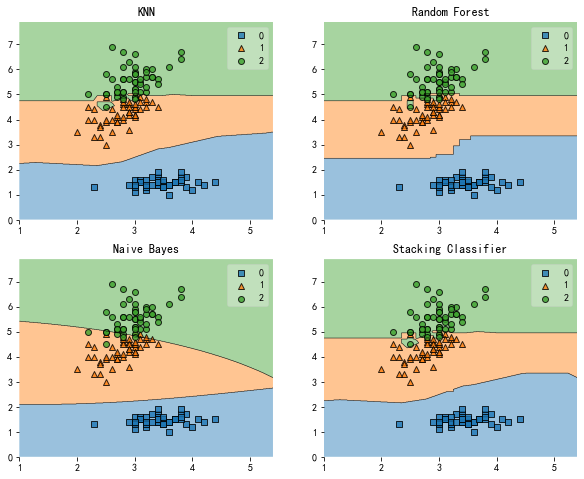

In [8]:
# 以python自带的鸢尾花数据集为例
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(label)

plt.show()